In [2]:
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# B - Matplotlib with Pandas

# 1. Lineplots

In [14]:
#Load the data
raw_data = pd.read_csv("E:\\Matplotlib\\Marketing.csv")

print(raw_data.shape)
raw_data.head()


(182, 6)


,Date,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,Monday,707,5211,651.375,No Promo
1,10/11/2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,Wednesday,1520,12475,1559.375,Promotion Blue
3,12/11/2020,Thursday,1726,14414,1801.750,No Promo
4,13/11/2020,Friday,2134,20916,2614.500,No Promo


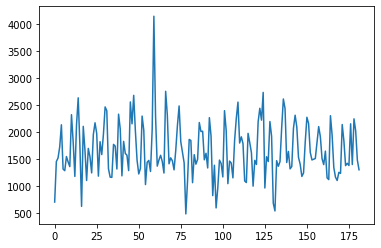

(182, 6)


In [13]:
#Example 1: Simple Line Graph

#raw_data['Visitors']
plt.plot(raw_data['Visitors'])

plt.show()

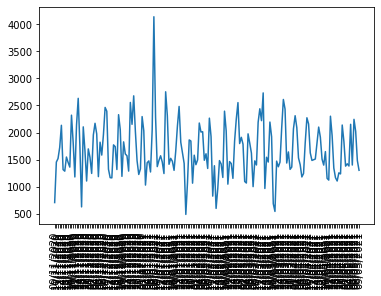

In [15]:
#Example 2: Line graph with xticks

plt.plot(raw_data['Visitors'])
plt.xticks(range(0, len(raw_data['Visitors'])), raw_data['Date'], rotation = 90)

plt.show()



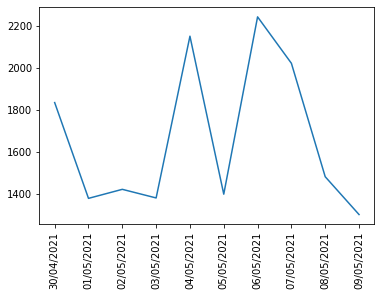

In [24]:
#Example 3: line graph with xtickes and less data

a = raw_data.tail(10).reset_index() #reset will chang ethe index column as it is a subset of main raw data

plt.plot(a['Visitors'])
plt.xticks(range(0, len(a['Visitors'])), a['Date'], rotation = 90)

plt.show()

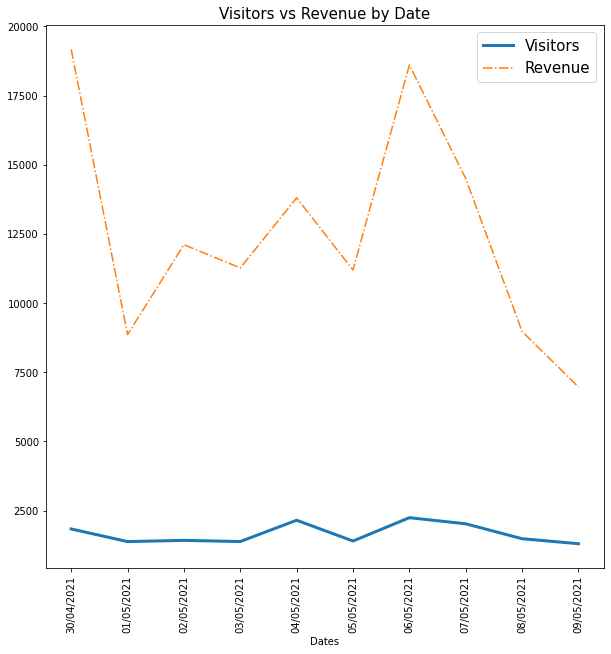

In [41]:
#Example 4: 2+ data points on the graph

plt.figure(figsize = (10,10))

plt.plot(a['Visitors'], label = 'Visitors', linewidth = 3.) #label works only when legend() is called
plt.plot(a['Revenue'], label = 'Revenue', linestyle = "-.")

plt.xticks(range(0, len(a['Visitors'])), a['Date'], rotation = 90)

plt.title("Visitors vs Revenue by Date", fontsize = 15)

plt.legend(loc = 'upper right',fontsize = 15 )

plt.xlabel("Dates")

plt.show()

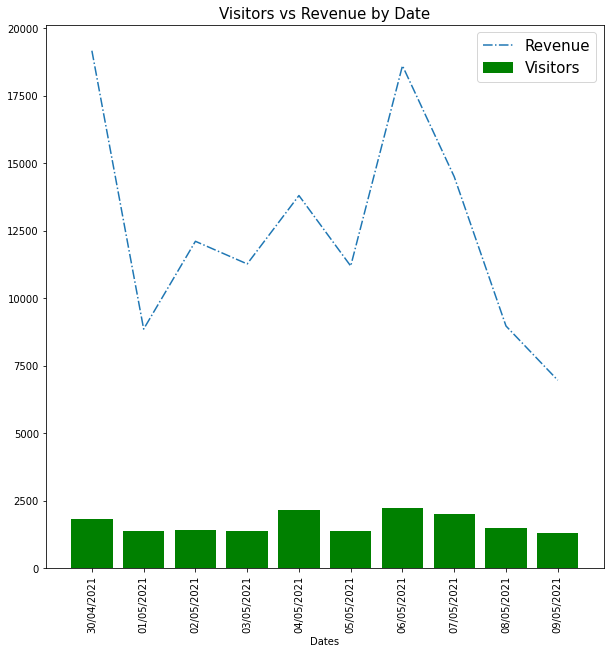

In [44]:
#Example 5: Combograph(histogram + line plot)


plt.figure(figsize = (10,10))

plt.bar(range(0, len(a['Visitors'])), a['Visitors'], label = 'Visitors', linewidth = 3., color = 'green') 

plt.plot(a['Revenue'], label = 'Revenue', linestyle = "-.")

plt.xticks(range(0, len(a['Visitors'])), a['Date'], rotation = 90)

plt.title("Visitors vs Revenue by Date", fontsize = 15)

plt.legend(loc = 'upper right',fontsize = 15 )

plt.xlabel("Dates")

plt.show()

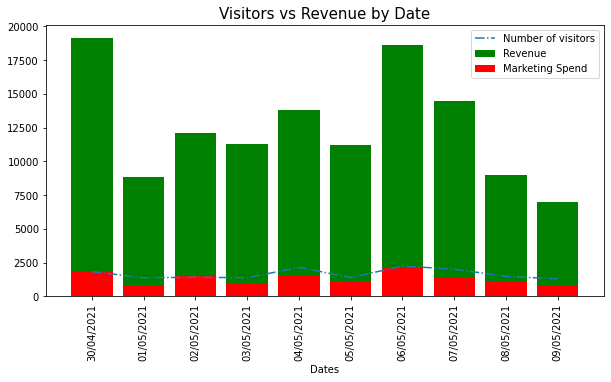

In [49]:
#Example 6: Combo stack bars
 
plt.figure(figsize = (10,5))

plt.bar(range(0, len(a['Revenue'])), a['Revenue'], label = 'Revenue', linewidth = 3., color = 'green') 
plt.bar(range(0, len(a['Visitors'])), a['Marketing Spend'], label = 'Marketing Spend', linewidth = 3., color = 'red') 

plt.plot(a['Visitors'], label = 'Number of visitors', linestyle = "-.")

plt.xticks(range(0, len(a['Visitors'])), a['Date'], rotation = 90)

plt.title("Visitors vs Revenue by Date", fontsize = 15)

plt.legend(loc = 'upper right',fontsize = 10 )

plt.xlabel("Dates")

plt.show()

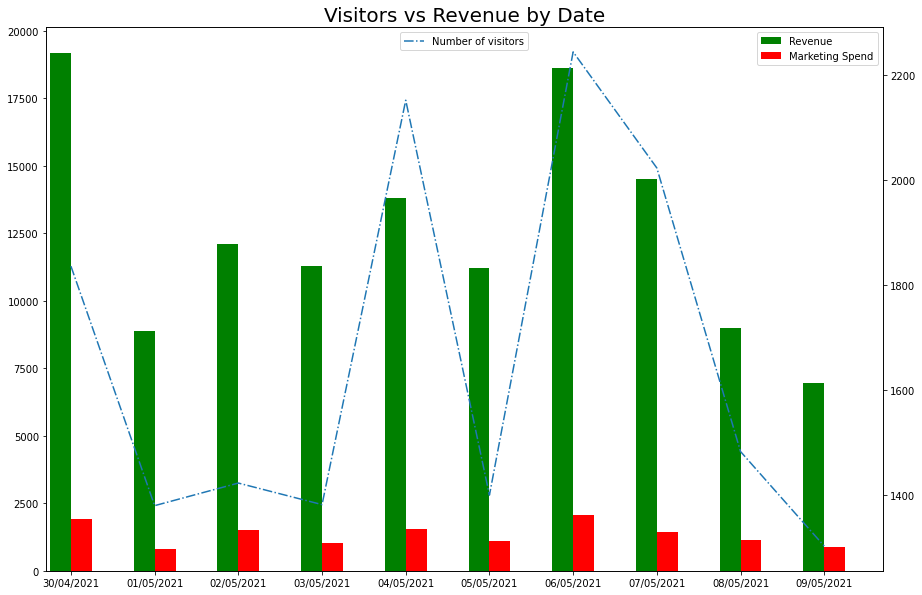

In [63]:
#Example 7: Combo 2 + bar graphs + Secondary scale

#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-barplot: pandas plotting

weight = .30 #to begin the date from 30/04/2021, weight is given .30 and then subtract from length of visitors @ ylim


a[['Revenue', 'Marketing Spend']].plot(kind = 'bar', color = ['green', 'red'], figsize = (15, 10))

a['Visitors'].plot(label = 'Number of visitors', linestyle = "-.", secondary_y = True)


plt.xticks(range(0, len(a['Visitors'])), a['Date'], rotation = 90)

plt.title("Visitors vs Revenue by Date", fontsize = 20)

plt.legend(loc = 'upper center',fontsize = 10 )

plt.xlim(-weight, len(a['Visitors'])- weight)

plt.xlabel("Dates")


plt.show()


# 2. Scatterplot (Matpltlib with Pandas)

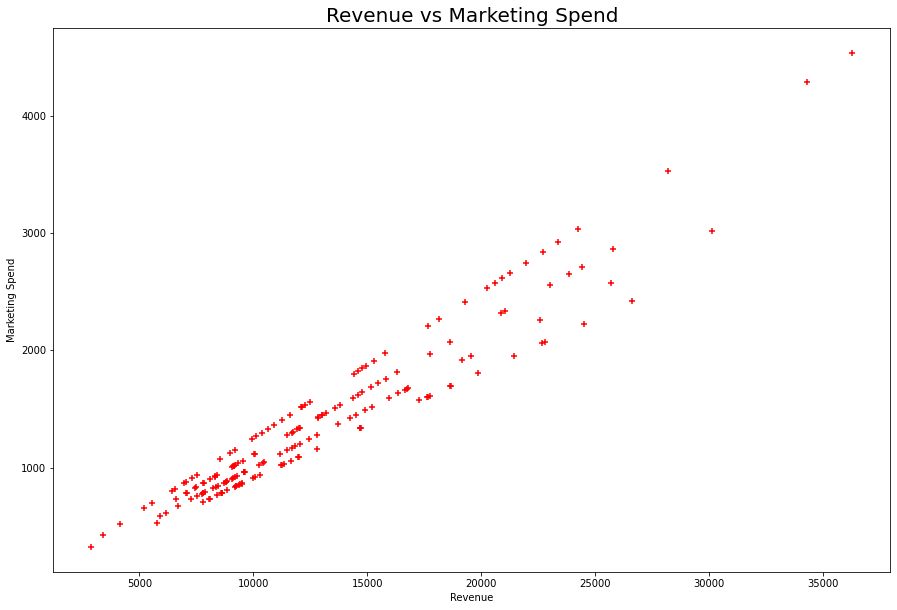

In [71]:
# Example 1: Simple scatterplot

plt.figure(figsize = (15,10))

plt.scatter(raw_data['Revenue'], raw_data['Marketing Spend'], c = 'red', marker = '+')

plt.title("Revenue vs Marketing Spend", fontsize = 20)

plt.xlabel("Revenue")
plt.ylabel("Marketing Spend")

plt.show()


In [72]:
raw_data.columns

Index(['Date', 'Day_Name', 'Visitors', 'Revenue', 'Marketing Spend', 'Promo'], dtype='object')

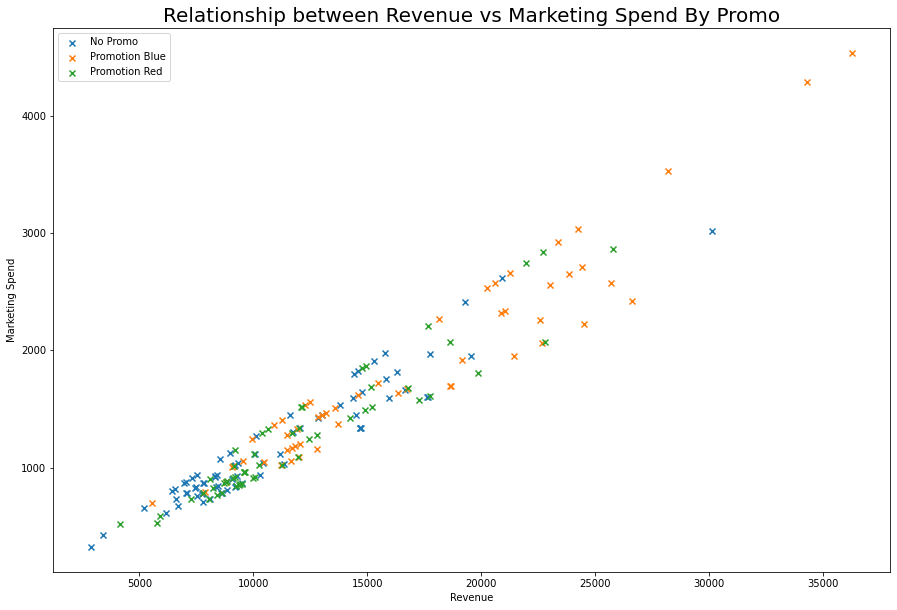

In [75]:
#Example 2: Scatterplot with groups

groups = raw_data[['Promo', 'Revenue', 'Marketing Spend']].groupby('Promo')

groups

fig, ax = plt.subplots(figsize = (15,10))

for x, y in groups:#(or) can be written as promo, group in groups
    ax.scatter(y['Revenue'], y['Marketing Spend'], marker = 'x', label = x)
    
ax.legend()

plt.title("Relationship between Revenue & Marketing Spend By Promo", fontsize = 20)
plt.xlabel("Revenue")
plt.ylabel("Marketing Spend")

plt.show()

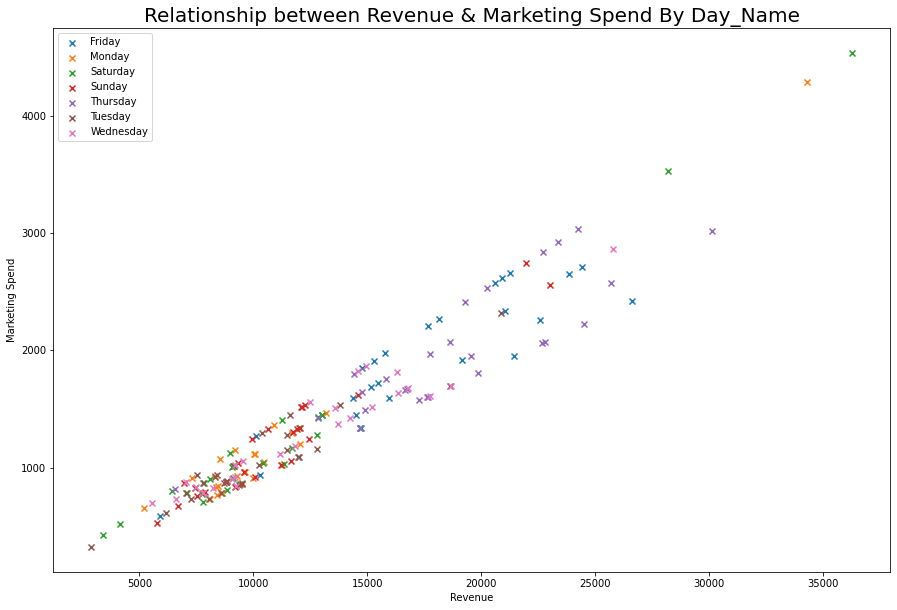

In [76]:
#Example 3: Scatterplot with groups

groups = raw_data[['Day_Name', 'Revenue', 'Marketing Spend']].groupby('Day_Name')

groups

fig, ax = plt.subplots(figsize = (15,10))

for x, y in groups:#(or) can be written as promo, group in groups
    ax.scatter(y['Revenue'], y['Marketing Spend'], marker = 'x', label = x)
    
ax.legend()

plt.title("Relationship between Revenue & Marketing Spend By Day_Name", fontsize = 20)
plt.xlabel("Revenue")
plt.ylabel("Marketing Spend")

plt.show()